In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
import sys
sys.path.insert(0, r"C:\Users\axeli\Desktop\Github\crypto-trading\Scraping")

## Updating Files

In [3]:
import crypto_scraper as cs
from pybit import usdt_perpetual

session_unauth = usdt_perpetual.HTTP(
    endpoint="https://api-testnet.bybit.com"
)

bybit_upd = cs.ByBit_Scraper(session_unauth)

f_list = [
    r"C:\Users\axeli\Desktop\Github\crypto-trading\Data Analysis\BTCUSDT 5.csv",
    r"C:\Users\axeli\Desktop\Github\crypto-trading\Data Analysis\BTCUSDT 15.csv"
]

for f in f_list:
    bybit_upd.set_dataframe(pd.read_csv(f))
    bybit_upd.update_history()
    bybit_upd.to_csv(f)

BTCUSDT Starting Updating ...
	Extraction Time: 2022-09-21 12:25:00
Ending Updating ...
Creating .csv file ...
BTCUSDT Starting Updating ...
	Extraction Time: 2022-09-21 12:30:00
BTCUSDT is already Updated ...
Creating .csv file ...


## Analysis & Add Indicators

In [4]:
btc5 = pd.read_csv("BTCUSDT 5.csv").iloc[:, 3:].set_index('datetime')
btc15 = pd.read_csv("BTCUSDT 15.csv").iloc[:, 3:].set_index('datetime')

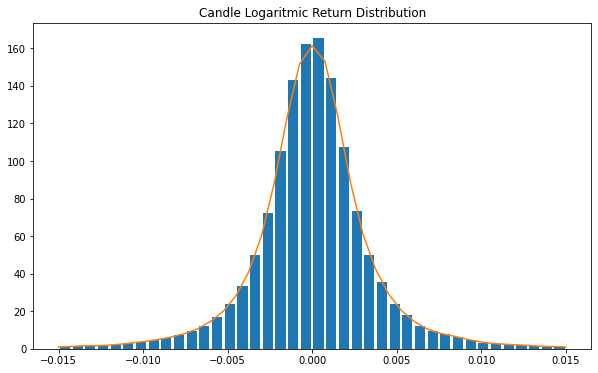

In [5]:
import scipy.stats as stats

data = np.log(btc15['close']/btc15['open'])

density = stats.gaussian_kde(data)

plt.figure(figsize = (10, 6))

n, x, _ = plt.hist(data, bins = 40, rwidth = 0.8,
         range = (-0.015, 0.015), density = True)

plt.title("Candle Logaritmic Return Distribution")
plt.plot(x, density(x))
plt.show();

In [15]:
btc15['candle'] = np.where(btc15['close'] > btc15['open'], 1, 0)
btc15['candle'].rolling(10).mean().head(25)

datetime
2020-02-17 11:15:00    NaN
2020-02-17 11:30:00    NaN
2020-02-17 11:45:00    NaN
2020-02-17 12:00:00    NaN
2020-02-17 12:15:00    NaN
2020-02-17 12:30:00    NaN
2020-02-17 12:45:00    NaN
2020-02-17 13:00:00    NaN
2020-02-17 13:15:00    NaN
2020-02-17 13:30:00    0.4
2020-02-17 13:45:00    0.3
2020-02-17 14:00:00    0.3
2020-02-17 14:15:00    0.3
2020-02-17 14:30:00    0.3
2020-02-17 14:45:00    0.3
2020-02-17 15:00:00    0.3
2020-02-17 15:15:00    0.3
2020-02-17 15:30:00    0.3
2020-02-17 15:45:00    0.4
2020-02-17 16:00:00    0.5
2020-02-17 16:15:00    0.6
2020-02-17 16:30:00    0.7
2020-02-17 16:45:00    0.7
2020-02-17 17:00:00    0.6
2020-02-17 17:15:00    0.5
Name: candle, dtype: float64

In [6]:
from ta.trend import SMAIndicator
from ta.trend import EMAIndicator

In [7]:
periods = [4, 8, 12, 24, 48, 96]

ind = pd.DataFrame() #Indicators Dataframe

for p in periods:
    ind[f'SMA_{p}'] = SMAIndicator(btc15['close'], p).sma_indicator()
    ind[f'EMA_{p}'] = EMAIndicator(btc15['close'], p).ema_indicator()

ind.set_index(btc15.index, inplace = True)

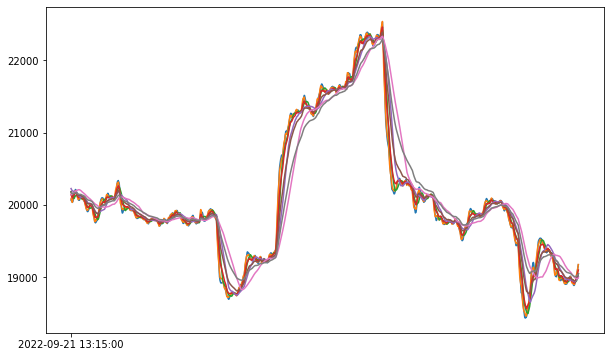

In [8]:
plt.figure(figsize = (10, 6))

labels = [ind.index[int(i)-1] for i in np.linspace(0, len(ind.index), 5)]
pos = [int(x) for x in np.linspace(0, len(ind.index), 5)]

plt.xticks(pos, labels)

for ma in ind.columns[4:]:
    plt.plot(ind[ma][-2000:])

### Breakout Analysis

In [9]:
brk_df = btc15
brk_df['high (1)'] = btc15['high'].shift(1)
brk_df['low (1)'] = btc15['low'].shift(1)

brk_df

,open,high,low,close,high (1),low (1)
datetime,,,,,,
2020-02-17 11:15:00,9632.88,9658.14,9629.56,9658.14,NaN,NaN
2020-02-17 11:30:00,9658.14,9701.11,9588.07,9604.98,9658.14,9629.56
2020-02-17 11:45:00,9604.98,9640.91,9583.22,9600.32,9701.11,9588.07
2020-02-17 12:00:00,9600.32,9648.28,9579.85,9613.43,9640.91,9583.22
2020-02-17 12:15:00,9613.43,9656.98,9611.24,9643.22,9648.28,9579.85
...,...,...,...,...,...,...
2022-09-21 12:15:00,19157.33,19177.58,19146.87,19155.34,19174.13,19145.05
2022-09-21 12:30:00,19181.21,19267.00,19174.68,19240.50,19177.58,19146.87
2022-09-21 12:45:00,19240.50,19281.29,19218.69,19246.59,19267.00,19174.68


In [10]:
top_brk = brk_df['high'] > brk_df['high (1)']
bot_brk = brk_df['low'] < brk_df['low (1)']
(brk_df['close'].loc[top_brk] > brk_df['high (1)'].loc[top_brk]).mean(), (brk_df['close'].loc[bot_brk] < brk_df['low (1)'].loc[bot_brk]).mean()

(0.516672435675551, 0.506290926099158)

### Machine Learning Analysis

In [34]:
def fm(p):
    x, y = p
    return np.sqrt((x + 2 - y)) + np.sqrt(-(x**2) +y)

In [35]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-1, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

C:\Users\axeli\AppData\Local\Temp\ipykernel_23964\2510922297.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x + 2 - y)) + np.sqrt(-(x**2) +y)


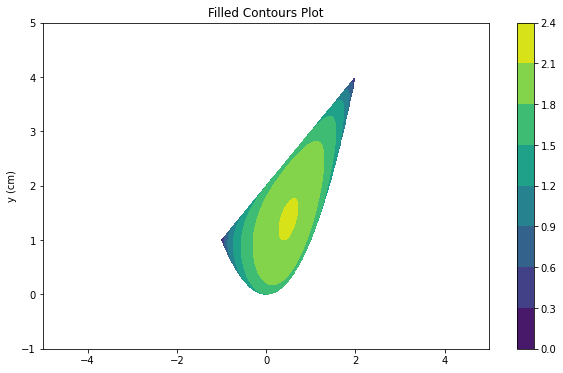

In [38]:
fig,ax=plt.subplots(1,1, figsize = (10, 6))
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
#ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()